# Titanic Dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Datset

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Exploratory Data Analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### Heat map to find the null values in each column

<AxesSubplot:>

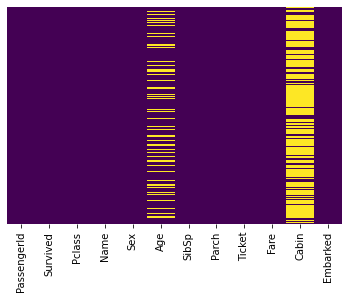

In [6]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see that there are null values in Age and Cabin columns

##### Number of peoples survived and dead

<AxesSubplot:xlabel='Survived', ylabel='count'>

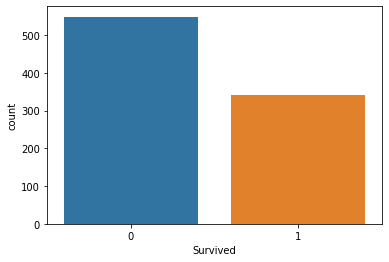

In [7]:
sns.countplot(x='Survived', data=df_train)

#####  Number of males and females survived and dead 

<AxesSubplot:xlabel='Survived', ylabel='count'>

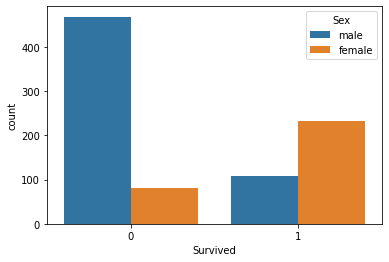

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df_train)

##### Number of peoples survived and dead in each class

<AxesSubplot:xlabel='Survived', ylabel='count'>

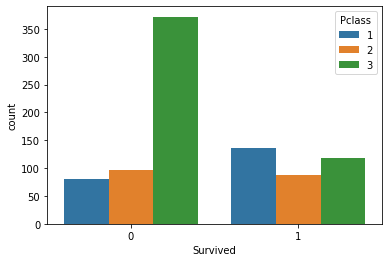

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df_train)

##### Number of people in each age category

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

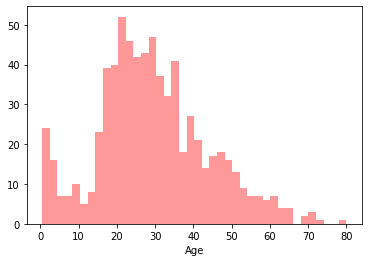

In [10]:
sns.distplot(df_train['Age'].dropna(), kde=False, color='red', bins=40)

##### Histogram of Fare of the ticket

<AxesSubplot:>

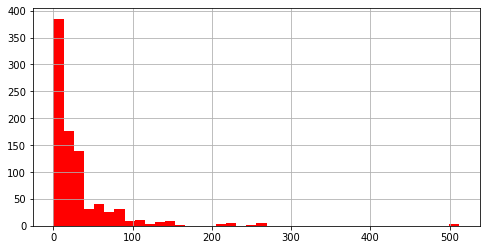

In [11]:
df_train['Fare'].hist(color='red', bins=40, figsize =(8,4))

##### Count plot for Sibsp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

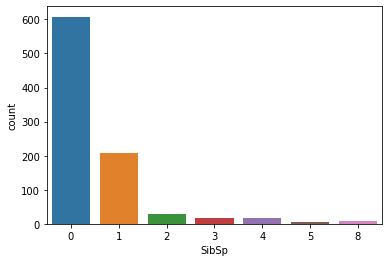

In [12]:
sns.countplot(x='SibSp', data=df_train)

### Feature Engineering

Now, before doing feature engineering I am going to merge train and test data.

In [13]:
df_final = df_train.append(df_test)
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Dropping unwanted columns

First I am going to drop the Cabin column as it has many null values

In [14]:
df_final.drop('Cabin', axis=1, inplace=True)
df_final.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Also I am going to drop Passenger ID, Name, Ticket column as it is unique for all passengers.

In [15]:
df_final.drop(['Name', 'Ticket','PassengerId'], axis =1, inplace= True)
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


##### Handling missing values

In [16]:
# Calculating the percentage of missing values in each column(only catogorical)
features_nan = [features for features in df_final.columns if df_final[features].isnull().sum()>1]

for feature in features_nan:
    print('{}: {}% missing values'.format(feature, np.round(df_final[feature].isnull().mean(),4)))

Survived: 0.3193% missing values
Age: 0.2009% missing values
Embarked: 0.0015% missing values


I am going to replace the missing values with most repeated values, i.e. mode of the column for categorical variable and for non categorical variable I am going to replace null values with average.

In [17]:
df_final['Embarked'].mode()

0    S
dtype: object

In [18]:
def impute(col):
    if pd.isnull(col):
        return 'S'
    else:
        return col

In [19]:
df_final['Embarked'] = df_final['Embarked'].apply(impute)

In [20]:
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].mean())

<AxesSubplot:>

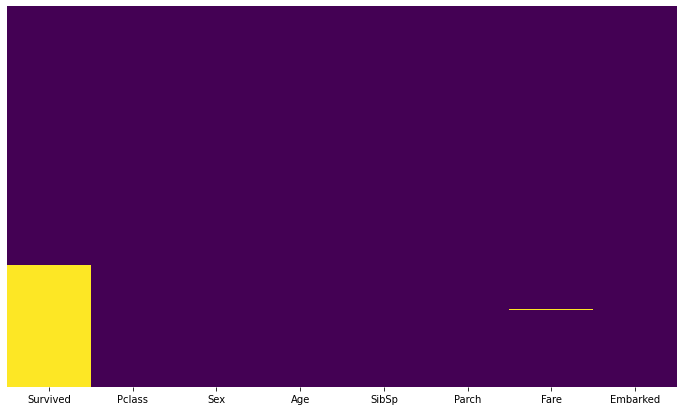

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df_final.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Here some yellow bars are showing for survived. But that is not a problem as they belong to test set.

In [22]:
df_final.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
dtype: int64

We can see that there is one record in fare that has a null value. So I am going to replace it with mean of the fare.

In [23]:
df_final['Fare'] = df_final['Fare'].fillna(df_final['Fare'].mean())

In [24]:
df_final.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

##### Encoding Categorical variables

In [25]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


We need to encode two columns, 'Sex' and 'Embarked'

In [26]:
df_final['Sex'] = pd.get_dummies(df_final['Sex'], drop_first=True)

In [27]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,S
1,1.0,1,0,38.0,1,0,71.2833,C
2,1.0,3,0,26.0,0,0,7.9250,S
3,1.0,1,0,35.0,1,0,53.1000,S
4,0.0,3,1,35.0,0,0,8.0500,S


In [28]:
df_final['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
df_final = pd.get_dummies(df_final, columns=['Embarked'], drop_first=True)

In [30]:
df_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,1,22.0,1,0,7.2500,0,1
1,1.0,1,0,38.0,1,0,71.2833,0,0
2,1.0,3,0,26.0,0,0,7.9250,0,1
3,1.0,1,0,35.0,1,0,53.1000,0,1
4,0.0,3,1,35.0,0,0,8.0500,0,1


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   uint8  
 3   Age         1309 non-null   float64
 4   SibSp       1309 non-null   int64  
 5   Parch       1309 non-null   int64  
 6   Fare        1309 non-null   float64
 7   Embarked_Q  1309 non-null   uint8  
 8   Embarked_S  1309 non-null   uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 75.4 KB


So, Now our dataset is ready for Modeling.

### Training Model

##### Splitting the dataset back to train and test 

In [32]:
df_train1 = df_final[~df_final['Survived'].isnull()]
df_test1 = df_final[df_final['Survived'].isnull()]

In [33]:
df_test1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,NaN,3,1,34.5,0,0,7.8292,1,0
1,NaN,3,0,47.0,1,0,7.0000,0,1
2,NaN,2,1,62.0,0,0,9.6875,1,0
3,NaN,3,1,27.0,0,0,8.6625,0,1
4,NaN,3,0,22.0,1,1,12.2875,0,1


In [34]:
df_train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,3,1,22.0,1,0,7.2500,0,1
1,1.0,1,0,38.0,1,0,71.2833,0,0
2,1.0,3,0,26.0,0,0,7.9250,0,1
3,1.0,1,0,35.0,1,0,53.1000,0,1
4,0.0,3,1,35.0,0,0,8.0500,0,1


In [35]:
df_test1 = df_test1.drop('Survived', axis = 1)
df_test1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


In [36]:
X = df_train1.drop('Survived', axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1


In [37]:
y = df_train1['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [39]:
len(X_train)

596

In [40]:
len(y_train)

596

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic regression classifier

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153  22]
 [ 32  88]]


0.8169491525423729

##### K Fold cross validation

In [44]:
## For Kernel SVM
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier , X=X_train , y=y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('Standard deviation: {:.2f} %'.format(accuracies.std()*100))

Accuracy: 79.69 %
Standard deviation: 7.82 %


##### Grid searchCV (HyperParameter Tuning)

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid = GridSearchCV(classifier, param_grid, refit = True, verbose = 3, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ...............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.633 total time=   0.0s
[CV 2/10] END ..............C=0.001, penalty=l

[CV 7/10] END .............C=1000.0, penalty=l2;, score=0.746 total time=   0.0s
[CV 8/10] END .............C=1000.0, penalty=l2;, score=0.763 total time=   0.0s
[CV 9/10] END .............C=1000.0, penalty=l2;, score=0.729 total time=   0.0s
[CV 10/10] END ............C=1000.0, penalty=l2;, score=0.932 total time=   0.0s


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sanja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [47]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, random_state=0)


In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.01, penalty='l2', random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[160  15]
 [ 44  76]]


0.8

As the accuracy is low than before, I am going to use the previous parameters itself.

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[153  22]
 [ 32  88]]


0.8169491525423729

In [53]:
classifier.predict(sc.transform([[3,0,47.0,1,0,7.0000,0,1]]))

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.])

### Predicting the test result adn storing it in a csv file

In [54]:
pred = classifier.predict(sc.transform(df_test1))
pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [55]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': pred})
output.head(20)
output.to_csv('Titanic_submission.csv', index=False)